In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'207']

In [6]:
df

,From Date,PM2.5y1,PM1y1,NOy1,NO2y1,NOxy1,NH3y1,SO2y1,COy1,Ozoney1,...,Ozone,RH,WS,WD,SR,BP,AT,year,month,day
0,735966,318.998571,480.381429,159.387143,95.130000,302.424286,82.168571,39.745714,2.932857,46.822857,...,55.380000,60.705714,0.887143,167.552857,61.578571,736.275714,12.331429,2016,1,3
1,735973,289.505714,472.055714,228.792857,84.445714,387.365714,92.285714,40.324286,5.032857,45.618571,...,37.230000,70.215714,0.842857,218.824286,56.858571,733.617143,12.807143,2016,1,10
2,735980,194.122857,341.192857,73.390000,73.867143,165.957143,59.112857,25.532857,2.041429,52.710000,...,56.340000,69.085714,1.155714,195.938571,60.500000,734.085714,11.747143,2016,1,17
3,735987,245.710000,434.321429,72.510000,88.392857,177.928571,56.801429,28.978571,2.494286,69.548571,...,69.467143,74.524286,0.992857,195.488571,58.688571,734.132857,8.005714,2016,1,24
4,735994,200.511429,430.995714,154.150000,100.797143,300.324286,66.545714,35.051429,3.425714,49.100000,...,49.721429,66.011429,0.885714,191.221429,67.075714,733.885714,12.675714,2016,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,737394,190.887143,351.001429,150.995714,101.784286,182.934286,41.087143,7.274286,2.272857,27.704286,...,33.955714,65.341429,0.708571,182.577143,68.381429,971.778571,15.910000,2019,12,1
204,737401,234.834286,415.775714,185.720000,107.428571,220.201429,40.914286,6.067143,2.631429,25.794286,...,30.771429,63.680000,0.488571,202.080000,75.555714,972.078571,12.905714,2019,12,8
205,737408,198.044286,325.415714,115.980000,84.142857,147.455714,39.132857,12.660000,2.165000,34.307143,...,29.844286,71.202857,0.722857,175.794286,62.701429,972.037143,17.242857,2019,12,15
206,737415,281.095714,430.512857,148.477143,102.625714,184.412857,42.044286,21.525714,2.811429,101.102857,...,21.508571,78.275714,0.567143,202.740000,49.167143,971.940000,12.917143,2019,12,22


In [7]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [8]:
X1 = df[['PM1y1', 'NOy1', 'NO2y1', 'NOxy1','RHy1', 'WDy1','BPy1','PM1y2', 'NOy2', 'NO2y2', 'NOxy2','RHy2', 'WDy2','BPy2','PM1y3', 'NOy3', 'NO2y3', 'NOxy3','RHy3', 'WDy3','BPy3','year', 'month', 'day']]
Y1 = df['Ozone']

In [9]:
X1

,PM1y1,NOy1,NO2y1,NOxy1,RHy1,WDy1,BPy1,PM1y2,NOy2,NO2y2,...,PM1y3,NOy3,NO2y3,NOxy3,RHy3,WDy3,BPy3,year,month,day
0,480.381429,159.387143,95.130000,302.424286,63.915714,181.641429,735.684286,511.262857,181.062857,99.385714,...,539.715000,121.173333,45.755000,225.991667,77.245000,176.780000,741.255000,2016,1,3
1,472.055714,228.792857,84.445714,387.365714,69.262857,219.742857,733.594286,446.342857,230.967143,79.677143,...,428.627143,69.601429,68.111429,159.321429,64.224286,218.677143,741.577143,2016,1,10
2,341.192857,73.390000,73.867143,165.957143,69.927143,194.402857,734.175714,350.551429,50.874286,76.207143,...,349.972857,163.557143,61.645714,286.550000,77.267143,192.397143,743.348571,2016,1,17
3,434.321429,72.510000,88.392857,177.928571,73.827143,193.784286,734.034286,443.201429,77.041429,89.930000,...,442.107143,151.974286,98.222857,300.505714,64.072857,213.774286,744.047143,2016,1,24
4,430.995714,154.150000,100.797143,300.324286,64.908571,195.004286,733.901429,411.392857,156.544286,99.442857,...,410.105714,208.472857,94.730000,376.922857,67.337143,188.288571,744.534286,2016,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,351.001429,150.995714,101.784286,182.934286,64.848571,188.724286,990.030000,377.317143,104.675714,102.722857,...,365.194286,102.611429,94.672857,224.481429,46.260000,242.354286,731.838571,2019,12,1
204,415.775714,185.720000,107.428571,220.201429,66.261429,191.315714,990.087143,467.504286,324.268571,127.561429,...,401.037143,183.327143,100.610000,340.050000,64.818571,219.628571,730.594286,2019,12,8
205,325.415714,115.980000,84.142857,147.455714,68.808571,187.565714,990.711429,387.571429,119.221429,124.638571,...,385.092857,109.684286,98.288571,237.367143,70.787143,185.580000,734.424286,2019,12,15
206,430.512857,148.477143,102.625714,184.412857,63.591429,194.880000,992.834286,236.960714,35.408571,72.678571,...,391.778571,149.338571,86.021429,280.600000,64.235714,232.448571,734.771429,2019,12,22


In [10]:
xtrain=X1.loc['0':'155']
ytrain=Y1.loc['0':'155',]
xtest=X1.loc['155':'207']
ytest=Y1.loc['155':'207']

In [176]:
#xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2)

In [41]:
forest = RandomForestRegressor(n_estimators=2500,
                              max_depth=24,
                              max_features='auto',
                              min_samples_split=2,
                              min_samples_leaf=2,random_state=12)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=24, min_samples_leaf=2, n_estimators=2500,
                      random_state=12)

In [42]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.9080795492611

Score on test data: 0.1662270252340936

Root Mean Squared Error: 16.158277762945097

Overall model accuracy: 0.1662270252340936


In [43]:
test=data.loc['207':'259']
X=test[['PM1y1', 'NOy1', 'NO2y1', 'NOxy1','RHy1', 'WDy1','BPy1','PM1y2', 'NOy2', 'NO2y2', 'NOxy2','RHy2', 'WDy2','BPy2','PM1y3', 'NOy3', 'NO2y3', 'NOxy3','RHy3', 'WDy3','BPy3','year', 'month', 'day']]
X

,PM1y1,NOy1,NO2y1,NOxy1,RHy1,WDy1,BPy1,PM1y2,NOy2,NO2y2,...,PM1y3,NOy3,NO2y3,NOxy3,RHy3,WDy3,BPy3,year,month,day
207,428.861429,125.535714,76.847143,144.901429,64.444286,201.848571,992.431429,371.975714,80.651429,81.828571,...,416.398571,100.627143,83.730000,212.015714,65.350000,219.218571,734.987143,2019,12,29
208,456.537143,109.870000,52.067143,117.267143,71.032857,190.068571,991.651429,452.655714,174.377143,78.085714,...,332.717143,98.832857,67.225714,194.864286,73.302857,194.622857,735.531429,2020,1,5
209,349.680000,84.832857,58.215714,100.144286,60.418571,195.667143,990.642857,344.172857,75.938571,86.725714,...,282.434286,101.944286,57.842857,190.755714,73.417143,178.474286,735.414286,2020,1,12
210,405.144286,117.140000,58.545714,126.631429,62.968571,191.431429,991.448571,405.398571,71.592857,79.045714,...,346.604286,94.412857,75.028571,195.770000,60.464286,224.265714,732.054286,2020,1,19
211,223.215604,34.865714,44.648571,52.171429,69.247143,183.401429,993.708571,302.185714,74.328571,68.768571,...,237.858571,49.015714,68.434286,127.910000,63.667143,205.961429,727.997143,2020,1,26
212,225.330769,47.905714,49.550000,65.417143,64.004286,199.584286,990.021429,284.925714,32.171429,40.208571,...,251.350000,74.012857,62.091429,156.391429,71.321429,201.948571,727.672857,2020,2,2
213,198.920769,65.595714,50.381429,80.275714,68.345714,181.917143,995.670000,331.052857,112.367143,104.145714,...,328.171429,153.021429,66.960000,268.622857,70.425714,192.517143,735.524286,2020,2,9
214,333.581429,73.142857,72.708571,98.288571,68.392857,188.734286,991.444286,204.577143,35.207143,61.682857,...,279.338571,50.672857,67.874286,129.678571,58.125714,216.392857,735.264286,2020,2,16
215,192.155714,68.825714,73.708571,96.087143,61.525714,181.485714,994.125714,330.682857,122.750000,91.308571,...,275.608571,34.234286,82.401429,120.168571,56.437143,232.758571,732.928571,2020,2,23
216,172.547857,86.743571,88.330000,117.698571,63.528571,180.118571,991.534286,228.510000,79.125714,77.098571,...,280.377143,38.925714,62.438571,108.778571,47.897143,234.928571,726.498571,2020,3,1


In [44]:
predict=forest.predict(X)

In [45]:
predict

array([37.50873985, 31.64057764, 38.06463083, 37.31872266, 37.8081246 ,
       39.51127341, 39.56834889, 43.88376407, 44.63933654, 46.92473827,
       48.82178025, 47.47247888, 47.95895814, 50.89707918, 63.09992418,
       60.84841841, 66.79193649, 68.47561853, 67.8819931 , 64.9330882 ,
       64.97662051, 64.84143066, 67.26537206, 45.56682278, 58.09679054,
       58.10543555, 59.24928748, 33.81274495, 34.88958175, 32.22451933,
       34.84621755, 34.88967854, 32.24137952, 31.85389524, 34.12864377,
       32.15650555, 32.38241732, 35.5616271 , 33.78531554, 39.24042585,
       43.88653462, 43.14268979, 46.17081271, 46.74396985, 63.16528272,
       39.59323938, 36.81303208, 36.74565827, 40.71602129, 41.77657889,
       43.79356196, 36.72766103, 40.41230466])

In [46]:
dates=data.loc['207':'259','From Date']

In [47]:
X['From Date']=dates.values

In [48]:
X.columns

Index(['PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'RHy1', 'WDy1', 'BPy1', 'PM1y2',
       'NOy2', 'NO2y2', 'NOxy2', 'RHy2', 'WDy2', 'BPy2', 'PM1y3', 'NOy3',
       'NO2y3', 'NOxy3', 'RHy3', 'WDy3', 'BPy3', 'year', 'month', 'day',
       'From Date'],
      dtype='object')

In [49]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [50]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [51]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [52]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

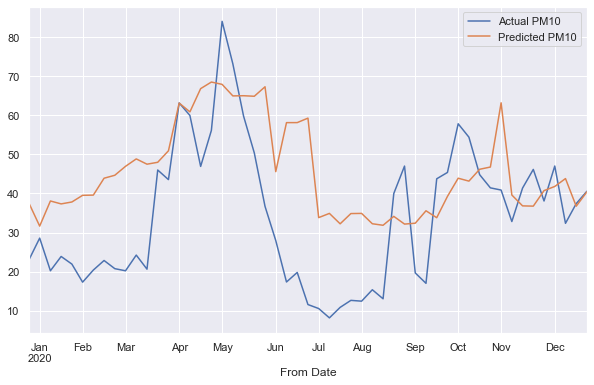

In [53]:
test['Ozone'].plot(legend=True, label='Actual PM10', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted PM10')

In [54]:
np.sqrt(mean_squared_error(test['Ozone'],X['pred']))

18.48468441530056

In [55]:
mae = metrics.mean_absolute_error(ytest, forest_pred)
mse = metrics.mean_squared_error(ytest, forest_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,forest_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 13.521184755814962
MSE: 261.089940264486
RMSE: 16.158277762945097
R-Squared: 0.1662270252340936


In [56]:
mae = metrics.mean_absolute_error(test['PM1'],X['pred'])
mse = metrics.mean_squared_error(test['PM1'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['PM1'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 121.80544168007357
MSE: 27226.816433197113
RMSE: 165.00550425121313
R-Squared: -1.2960748452532775


In [123]:
import pickle
filename = 'PM10_forest3y.sav'
pickle.dump(forest, open(filename, 'wb'))

In [124]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.7619243973170344


# 3rd plot

In [57]:
testcase = pd.DataFrame()

In [58]:
testcase['test']=ytest
testcase['pred']=forest_pred

In [59]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [60]:
testcase

,test,pred,Corrected
155,81.874286,66.372957,82.531235
156,44.231429,35.291900,51.450177
157,16.544286,39.185370,23.027092
158,16.497143,37.738309,21.580031
159,18.280000,39.124716,22.966438
160,15.304286,38.119573,21.961295
161,13.075714,45.074051,28.915773
162,13.350000,44.342178,28.183900
163,15.944286,45.419065,29.260787
164,12.685714,47.890218,31.731940


<AxesSubplot:>

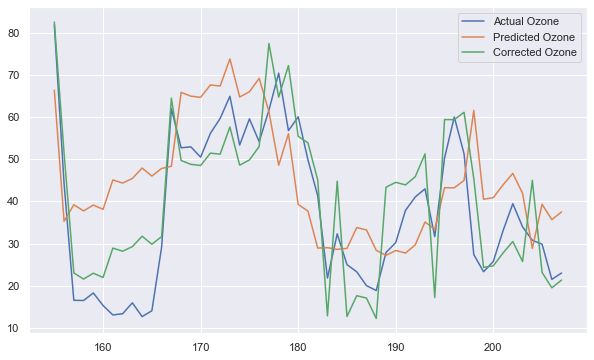

In [61]:
testcase['test'].plot(legend=True, label='Actual Ozone', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted Ozone')
testcase["Corrected"].plot(legend=True, label='Corrected Ozone')

In [62]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.7230530607591812

In [63]:
test2020=pd.DataFrame()

In [64]:
test2020['test']=test['Ozone']
test2020['pred']=X['pred']

In [65]:
test2020.index=test.index

In [66]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

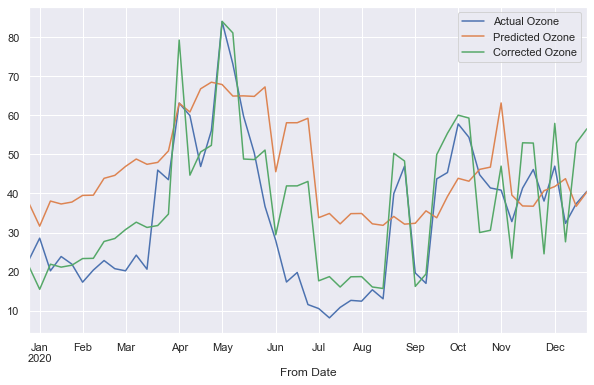

In [67]:
test2020['test'].plot(legend=True, label='Actual Ozone', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted Ozone')
test2020["Corrected"].plot(legend=True, label='Corrected Ozone')

In [68]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.6426570712172285